In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Versão 2.0 (com impressão da matriz para visualização)

# Nessa versão, ao invés de somarmos os itens da linha para verificar se percola, vamos conferindo o valor um por um dos elementos da linha/coluna vigente
# Com isso, será possível:
# 1) diminuir o número de iterações para verificar se a matriz percola
# 2) contabilizar o número de elementos do maior cluster, caso não percole

def percola_original(N, p):
  # gerar a matriz
  x = np.random.rand(N, N) < p
  x = np.where(x, 1, 0)
  print(x)
  # conferir se percola na horizontal + esquerda para direita
  maior_cluster_linha, i, linha = 0, 0, 0
  while i < N:
    k, confere = 0, 0
    while k < N and x[i][k] == 1:
        confere += 1
        k += 1
    if confere == N:
        return True, f'Percola na linha {i+1}'
    elif confere > maior_cluster_linha:
        maior_cluster_linha = confere
        linha = i + 1
    i += 1
  # conferir se percola na vertical
  maior_cluster_coluna, j, coluna = 0, 0, 0
  while j < N:
    k, confere = 0, 0
    while k < N and x[k][j] == 1:
        confere += 1
        k += 1
    if confere == N:
        return True, f'Percola na coluna {j+1}'
    elif confere > maior_cluster_coluna:
        maior_cluster_coluna = confere
        coluna = j + 1
    j += 1
  # verificar se há cluster maior da direita para a esquerda
  i = 0
  while i < N:
    k, confere = N-1, 0
    while k >= 0 and x[i][k] == 1:
      confere += 1
      k -= 1
      if confere > maior_cluster_linha:
        maior_cluster_linha = confere
        linha = i + 1
    i += 1
    # verificar se há cluster maior de baixo para cima
  j = 0
  while j < N:
    k, confere = N-1, 0
    while k >= 0 and x[k][j] == 1:
      confere += 1
      k -= 1
      if confere > maior_cluster_coluna:
        maior_cluster_coluna = confere
        coluna = j + 1
    j += 1
  # ver qual cluster é maior
  if maior_cluster_linha >= maior_cluster_coluna:
    r = maior_cluster_linha
    unidade = (f'linha {linha}')
  else:
    r = maior_cluster_coluna
    unidade = (f'coluna {coluna}')
  # caso não percole, retorna 0
  return False, f'o maior cluster está na {unidade} com tamanho', r

percola_original(10, 0.4)

[[1 0 1 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 1 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 1 0 0]]


(False, 'o maior cluster está na linha 9 com tamanho', 3)

In [4]:
# Sem a matriz para visualização

def percola(N, p):
  # gerar a matriz
  x = np.random.rand(N, N) < p
  x = np.where(x, 1, 0)
  # conferir se percola na horizontal + esquerda para direita
  maior_cluster_linha, i, linha = 0, 0, 0
  while i < N:
    k, confere = 0, 0
    while k < N and x[i][k] == 1:
        confere += 1
        k += 1
    if confere == N:
        return True, f'Percola na linha {i+1}'
    elif confere > maior_cluster_linha:
        maior_cluster_linha = confere
        linha = i + 1
    i += 1
  # conferir se percola na vertical
  maior_cluster_coluna, j, coluna = 0, 0, 0
  while j < N:
    k, confere = 0, 0
    while k < N and x[k][j] == 1:
        confere += 1
        k += 1
    if confere == N:
        return True, f'Percola na coluna {j+1}'
    elif confere > maior_cluster_coluna:
        maior_cluster_coluna = confere
        coluna = j + 1
    j += 1
  # verificar se há cluster maior da direita para a esquerda
  i = 0
  while i < N:
    k, confere = N-1, 0
    while k >= 0 and x[i][k] == 1:
      confere += 1
      k -= 1
      if confere > maior_cluster_linha:
        maior_cluster_linha = confere
        linha = i + 1
    i += 1
    # verificar se há cluster maior de baixo para cima
  j = 0
  while j < N:
    k, confere = N-1, 0
    while k >= 0 and x[k][j] == 1:
      confere += 1
      k -= 1
      if confere > maior_cluster_coluna:
        maior_cluster_coluna = confere
        coluna = j + 1
    j += 1
  # ver qual cluster é maior
  if maior_cluster_linha >= maior_cluster_coluna:
    r = maior_cluster_linha
    unidade = (f'linha {linha}')
  else:
    r = maior_cluster_coluna
    unidade = (f'coluna {coluna}')
  # caso não percole, retorna 0
  return False, f'o maior cluster está na {unidade} com tamanho', r

percola(62, 0.9)
print(percola(62,0.9)[2])

45


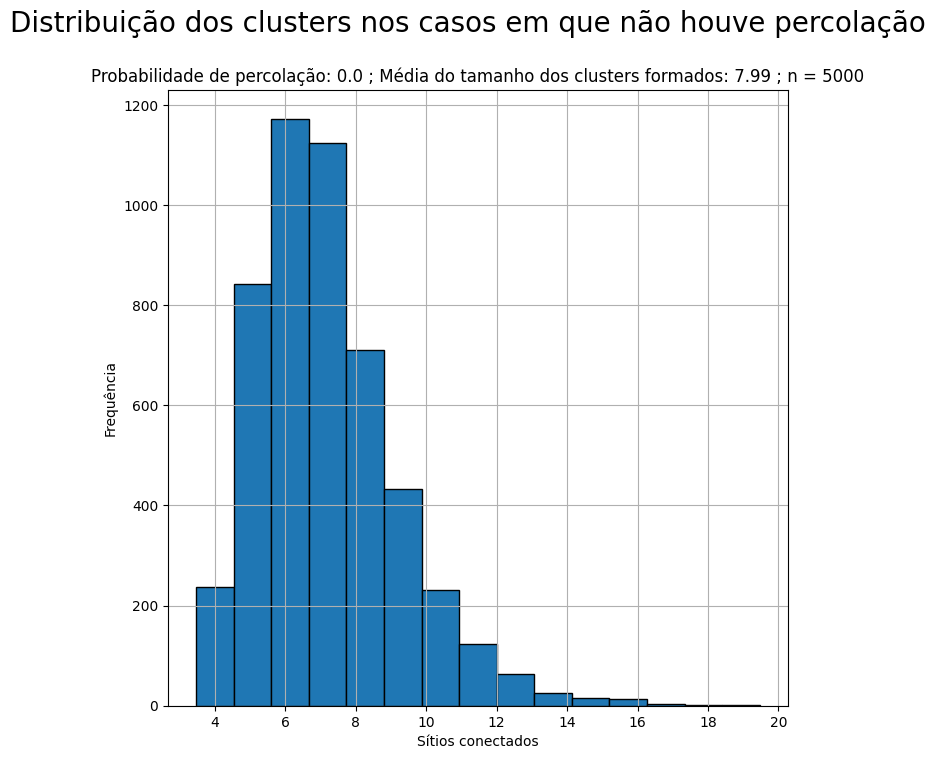

(0.0, '7.99')

In [11]:
# Função que calcula tanto a probabilidade de percolação dado N, p e n quanto a média do maior cluster

def prob_percolacao_e_media_cluster(N, p, n):
  valores_cluster = []
  per, soma, nao_percola = 0, 0, 0
  for i in range(n):
    y = percola(N, p)
    if y[0] == True:
      per += 1
    else:
      nao_percola += 1
      soma += y[2]
      valores_cluster.append(y[2])
  if nao_percola == 0:
    media = 0
  else:
    media = soma/nao_percola
  plt.figure(figsize=(8,8))
  plt.hist(valores_cluster, align='left', edgecolor='black', bins=15)
  plt.suptitle('Distribuição dos clusters nos casos em que não houve percolação', size=20)
  plt.title(f'Probabilidade de percolação: {per/n} ; Média do tamanho dos clusters formados: {media:.2f} ; n = {n}')
  plt.xlabel('Sítios conectados')
  plt.ylabel('Frequência')
  plt.grid(True)
  plt.show()
  return per/n, f'{media:.2f}'

prob_percolacao_e_media_cluster(50, 0.5, 5000)